In [4]:
import scanpy as sc
import squidpy as sq
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from squidpy.pl._utils import save_fig
from time import process_time

sc.logging.print_header()
sc.set_figure_params(facecolor="white", figsize=(8, 8))
sc.settings.verbosity = 3
sc.settings.dpi = 300
sq.__version__
sc.settings.figdir = "./figures"

%load_ext autoreload
%autoreload 2
%load_ext lab_black

scanpy==1.7.0rc2.dev1+g2a123065 anndata==0.7.4 umap==0.4.6 numpy==1.19.4 scipy==1.5.2 pandas==1.1.4 scikit-learn==0.23.2 statsmodels==0.12.1 python-igraph==0.8.3 leidenalg==0.8.2
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


In [3]:
adata_visium = sq.datasets.visium_fluo_adata()
adata_seqfish = sq.datasets.seqfish()
adata_fouri = sq.datasets.four_i()
adata_imc = sq.datasets.imc()

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [35]:
adata_seqfish.obs.celltype_mapped_refined.cat.categories.shape[0]

22

In [36]:
dic_list = []
for i in np.arange(10):
    for adata, data_id, cluster_id in zip(
        [adata_visium, adata_seqfish, adata_fouri, adata_imc],
        ["visium", "seqfish", "4i", "imc"],
        ["cluster", "celltype_mapped_refined", "cluster", "cell type"],
    ):
        start_t = process_time()
        sq.gr.spatial_neighbors(adata, coord_type="generic")
        duration_graph = process_time() - start_t

        start_t = process_time()
        sq.gr.nhood_enrichment(adata, cluster_key=cluster_id)
        duration_nhood = process_time() - start_t

        dic_list.append(
            {
                "dataset": data_id,
                "time_nhood": duration_nhood,
                "time_graph": duration_graph,
                "n_obs": adata.shape[0],
                "n_cluster": adata.obs[cluster_id].cat.categories.shape[0],
                "idx": i,
            }
        )

Creating graph using `generic` coordinates and `None` transform
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)
Adding `adata.uns['cluster_nhood_enrichment']`
Creating graph using `generic` coordinates and `None` transform
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)
Adding `adata.uns['celltype_mapped_refined_nhood_enrichment']`
Creating graph using `generic` coordinates and `None` transform
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:01)
Adding `adata.uns['cluster_nhood_enrichment']`
Creating graph using `generic` coordinates and `None` transform
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)
Adding `ada

In [37]:
df = pd.DataFrame(dic_list)
df = df.groupby(["dataset", "n_obs"]).mean()
df.reset_index(drop=False, inplace=True)
df

,dataset,n_obs,time_nhood,time_graph,n_cluster,idx
0,4i,270876,18.928116,1.094520,10.0,4.5
1,imc,4668,0.347980,0.019019,11.0,4.5
2,seqfish,19416,1.682685,0.049007,22.0,4.5
3,visium,2800,0.349783,0.011213,15.0,4.5


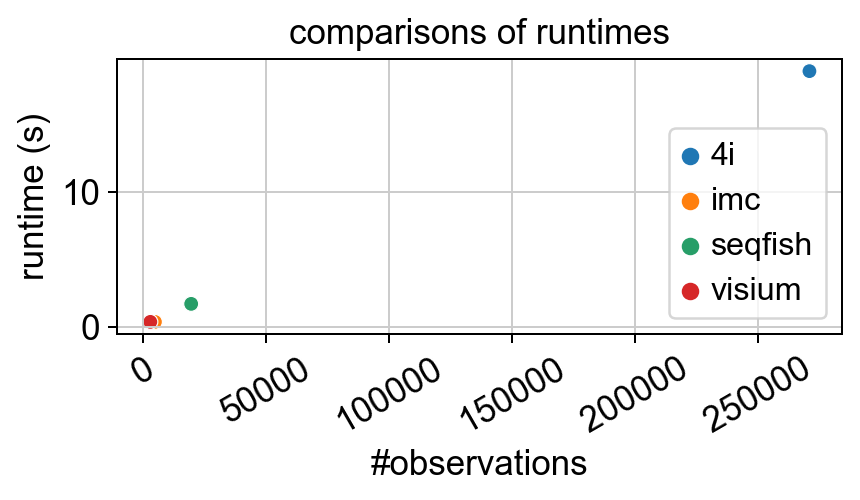

In [38]:
fig, ax = plt.subplots(tight_layout=True, dpi=180, figsize=(5, 3))
sns.scatterplot(data=df, x="n_obs", y="time_nhood", hue="dataset", ax=ax)
plt.xticks(rotation=30)
ax.set_ylabel("runtime (s)")
ax.set_xlabel("#observations")
ax.legend(loc="lower right")
_ = ax.set_title("comparisons of runtimes")

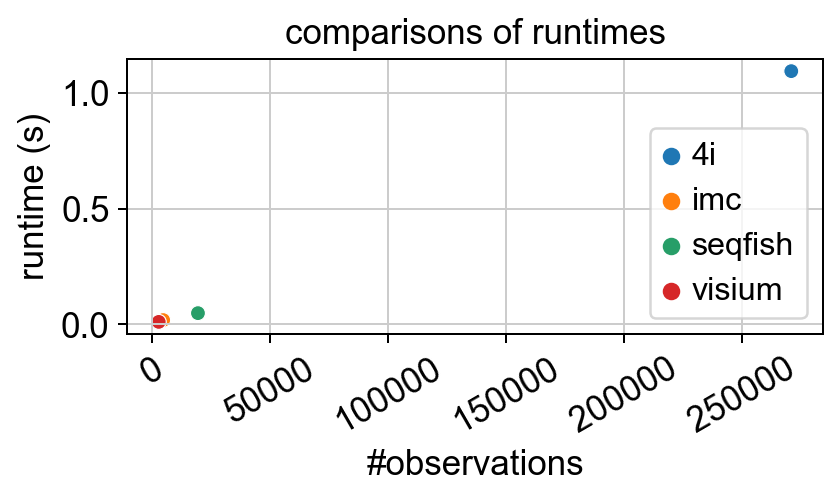

In [39]:
fig, ax = plt.subplots(tight_layout=True, dpi=180, figsize=(5, 3))
sns.scatterplot(data=df, x="n_obs", y="time_graph", hue="dataset", ax=ax)
plt.xticks(rotation=30)
ax.set_ylabel("runtime (s)")
ax.set_xlabel("#observations")
ax.legend(loc="lower right")
_ = ax.set_title("comparisons of runtimes")